<a href="https://colab.research.google.com/github/Aayu0710/Data-Science-ML/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch==1.5.0+cpu torchvision==0.6.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 127.3 MB 75 kB/s 
     |████████████████████████████████| 5.7 MB 54.9 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.5.0+cpu which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.5.0+cpu which is 

In [ ]:
import torch
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor 
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [ ]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())

0it [00:00, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


0it [00:00, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


0it [00:00, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


0it [00:00, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [ ]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
img, label = dataset[0]
img.shape, label

(torch.Size([1, 28, 28]), 5)

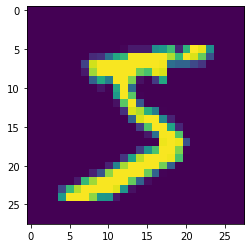

In [ ]:
plt.imshow(img[0])

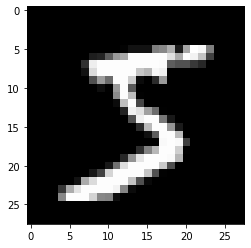

In [ ]:
plt.imshow(img[0], cmap='gray')

In [ ]:
def split_indices(n,val_pct):
  n_val = int(val_pct*n) #determine sizde of validation set
  idxs = np.random.permutation(n)
  return idxs[n_val:], idxs[:n_val]


In [ ]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)
print(len(train_indices), len(val_indices))
print("sample val indices: ", val_indices[:20])

48000 12000
sample val indices:  [58516 30864 48485 17788 15868 20054 40916 17978 57558 14137 29076  9808
  2299 21487  8761  5302 39400 25527 35856 25545]


In [ ]:
batch_size=100
#training sample and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset, batch_size, sampler=train_sampler)

valid_sampler = SubsetRandomSampler(val_indices)
valid_dl = DataLoader(dataset, batch_size, sampler=valid_sampler)

In [ ]:
import torch.nn.functional as F
import torch.nn as nn

In [ ]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out

In [ ]:
# we will create a model that contain a hidden layer with 32 activarions
input_size = 784
hidden_size = 32 # you can change this
num_classes = 10
model = MnistModel(input_size, hidden_size, num_classes)

In [ ]:
for t in model.parameters():
  print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [ ]:
# now we will generate outputs using our model, we will take 100 images and will
#feed it into our model
for images, labels in train_dl:
  print('images.shape', images.shape)
  outputs = model(images)
  loss  = F.cross_entropy(outputs, labels)
  print('loss: ', loss.item())
  break
print("outputs.shape",outputs.shape) # F.softax is to convert it into probability
print("sample outputs: \n", (outputs[:2].data))

images.shape torch.Size([100, 1, 28, 28])
loss:  2.3142378330230713
outputs.shape torch.Size([100, 10])
sample outputs: 
 tensor([[-0.1709,  0.0223, -0.1269,  0.1924,  0.0107,  0.1468, -0.0748,  0.1227,
          0.1305, -0.1649],
        [-0.0935,  0.0434, -0.1332,  0.1696, -0.0033,  0.0738, -0.0506,  0.0809,
          0.2059, -0.1053]])


In [ ]:
pip install jovian

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 5.1 MB/s 
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6503 sha256=201916a0e3f884d6f54f5993b30e304608b24838421a12fc7eba992c5e0dc204
  Stored in directory: /root/.cache/pip/wheels/2a/ea/87/dd57f1ecb4f0752f3e1dbf958ebf8b36d920d190425bcdc24d
Successfully built uuid


In [ ]:
import jovian

In [ ]:
jovian.commit

<function jovian.utils.commit.commit(message=None, files=[], outputs=[], environment=None, privacy='auto', filename=None, project=None, new_project=None, git_commit=False, git_message='auto', **kwargs)>

As our model size increase, we need to use GPUto train our model with a reasonable amount of time, gpu's conatin hundreds of cores that are optimized for performaning expensive matrix operation on floating point numbers in short time which makes them ideal for training deep neural network with many layers

We can check if a GPU is available and the required NVIDIA CUDA drivers are installed using torch.cuda.is_availabe.

In [ ]:
torch.cuda.is_available()


False

In [ ]:
# lets create a help fucntion to make sure our code uses the GPU if availabe, and defaults to using the GPU if its not
def get_default_device():
  "picks GPU if available, else CPU"
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')


In [ ]:
device = get_default_device()
device

device(type='cpu')

In [ ]:
# lets define a fucntion that can move data and model to a chossen device
def to_device(data, device):
  "move tensors to a chosen device"
  if isinstance(data, (list, tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device, non_blocking=True)

In [ ]:
for images, labels in train_dl:
  print(images.shape)
  images = to_device(images,device)
  print(images.device)
  break

torch.Size([100, 1, 28, 28])
cpu


Now we will define a deviceDataLoader class to wrap our existing data loaders and move data to the selected device, as a batch are accessed.we dont need to extend an existing class to create a Pytorch dataloader. all we need is an __iter__ method to reterive batches of data an __len__ method to get the number of batches

In [ ]:
class DeviceDataLoader():
  "wrap a dataloader to move data to a device"
  def __init__(self,dl,device):
    self.dl = dl
    self.device=device
  def __iter__(self):
    for b in self.dl:
      yield to_device(b, self.device)
    
  def __len__(self):
    "number of batches"
    return len(self.dl)

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
for xb,yb in valid_dl:
  print("xb device:", xb.device)
  print("yb: ", yb)
  break

xb device: cpu
yb:  tensor([3, 7, 8, 9, 3, 7, 8, 4, 1, 3, 8, 1, 5, 6, 7, 8, 5, 2, 1, 1, 4, 4, 2, 8,
        0, 1, 8, 0, 6, 7, 0, 7, 6, 1, 6, 9, 9, 1, 2, 2, 8, 5, 1, 4, 7, 4, 2, 9,
        4, 7, 0, 0, 7, 1, 8, 5, 1, 6, 9, 5, 6, 0, 9, 6, 9, 5, 7, 3, 9, 9, 6, 9,
        7, 8, 0, 9, 9, 8, 5, 5, 5, 3, 1, 2, 9, 4, 7, 8, 2, 9, 0, 9, 6, 5, 4, 3,
        8, 9, 2, 7])


In [ ]:
jovian.commit



<function jovian.utils.commit.commit(message=None, files=[], outputs=[], environment=None, privacy='auto', filename=None, project=None, new_project=None, git_commit=False, git_message='auto', **kwargs)>

In [ ]:
# training model
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
  #generate predictions
  preds = model(xb)
  #cal loss
  loss = loss_func(preds, yb)
  
  if opt is not None:
    #compute gradient
    loss.bakwards()
    #update parameters
    opt.steps()
    #reset gradients
    opt.zero_grad()
  metric_result = None
  if metric is not None:
    #compute the metric
    mertic_result = metric(preds, yb)
  return loss.item().len(xb), mertic_result


In [ ]:
def fit(epochs, lr, model, loss_fn, train_dl, valid_dl,
        metric=None, opt_fn=None):
  
  losses, metrics = [], []

  #instantiate the optimizer
  if opt_fn is None: opt_fn=torch.optim.SGD
  opt = torch.optim.SGD(model.parameters(), lr=lr)

  for epoch in range(epochs):
    #training
    for xb,yb in train_dl:
      loss_batch(model, loss_fn, xb, yb, metric)
    #evalute
    result = evalute(model, loss_fn, valid_dl,metric)
    val_loss, total_loss, val_metric = result

    #record the loss and metric
    losses.append(val_loss)
    metrics.append(val_metric)

    #print progress
    if metric is None:
      print("epoch [{}/{}], loss: {:4f}".formate(epoch+1, epochs, val_loss))
    else:
      print("epoch [{}/{}], loss: {:4f}, {}, {:.4f}".formate(epoch+1, epochs, val_loss, metric.__name__, val_metric))
  return losses, metric



In [ ]:
def accuracy(outputs, label):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
# lets see how model perfrom on the validation set with intial set of weight and biases
val_loss, total_loss, val_acc = evalute(model, F.cross_entropy, valid_dl, metric=accuracy)
print('loss: {:.4f}, accuracy: {:.4f}'.formate(val_loss, val_acc))

NameError: ignored